In [135]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pprint as pp
import hvplot.pandas
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [136]:
#import csv file
csv = 'cleaned_df5.csv'
df = pd.read_csv(csv)
df[['date','month','year']] = df['release_date'].str.split('/',3, expand = True)
df

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,...,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime,date,month,year
0,134803,tt0221431,en,The Newcomers,"Drama,Family",1/01/2000,False,False,2.339,3.9,...,4.8,465,US,United States of America,0,0,90,1,01,2000
1,65397,tt0249840,en,Nightfall,"Drama,Sci-Fi,Thriller",1/01/2000,False,False,1.555,3.3,...,3.3,463,US,United States of America,0,0,85,1,01,2000
2,44388,tt0139388,en,It Had to Be You,"Comedy,Romance",1/01/2000,False,False,9.691,6.2,...,5.6,2265,US,United States of America,0,0,90,1,01,2000
3,10384,tt0134983,en,Supernova,"Horror,Sci-Fi,Thriller",14/01/2000,False,False,13.377,5.0,...,4.8,18336,CH,Switzerland,90000000,14828081,91,14,01,2000
4,77434,tt0197096,en,What's Cooking?,"Comedy,Drama,Romance",20/01/2000,False,False,3.519,5.7,...,6.8,2811,US,United States of America,0,0,110,20,01,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,575322,tt5656994,en,Звёздный разум,"Adventure,Sci-Fi,Thriller",6/01/2022,False,False,925.268,5.6,...,3.4,3040,CY,Cyprus,0,0,98,6,01,2022
5349,825808,tt11209212,en,See for Me,"Crime,Drama,Mystery",7/01/2022,False,False,63.155,6.2,...,5.8,5113,CA,Canada,0,0,92,7,01,2022
5350,916740,tt13978306,en,Brazen,"Crime,Drama,Mystery",13/01/2022,False,False,61.998,4.9,...,4.1,12594,US,United States of America,0,0,94,13,01,2022
5351,760926,tt6020800,en,Gold,"Action,Adventure,Thriller",13/01/2022,False,False,70.686,6.3,...,5.4,10031,AU,Australia,6500000,176048,97,13,01,2022


In [147]:
#create dfs for each provider

#netflix
df_netflix = df[df['netflix_provider']=='Yes']
df_netflix_profit = df_netflix[df_netflix['budget']!=0]
df_netflix_profit['profit']=df_netflix_profit['revenue']-df_netflix_profit['budget']
#stan
df_stan = df[df['stan_provider']=='Yes']
df_stan_profit = df_stan[df_stan['budget']!=0]
df_stan_profit['profit']=df_stan_profit['revenue']-df_stan_profit['budget']
#amazon prime
df_amazon = df[df['amazon_provider']=='Yes']
df_amazon_profit = df_amazon[df_amazon['budget']!=0]
df_amazon_profit['profit']=df_amazon_profit['revenue']-df_amazon_profit['budget']


In [148]:
#create Netflix DF
Net_Provider = []
Net_Year = []
Net_Total_Movies = []
Net_Sum_Votes = []
Net_Sum_Scores = []
Net_Average_Votes = []
Net_Average_Score = []
Net_Popularity_Average = []
Net_Popularity_Max = []
Net_Runtime_Average = []
Net_Country_Count = []
Net_Profit = []

list_years = np.arange(2000,2023,1)

for year in list_years:
    df_netflix_year = df_netflix[df_netflix['year']==str(year)]
    Net_Provider.append('Netflix')
    Net_Year.append(year)
    Net_Total_Movies.append(df_netflix_year['original_title'].count())
    Net_Sum_Votes.append(df_netflix_year['imdb_votes'].sum())
    Net_Sum_Scores.append(df_netflix_year['imdb_rating'].sum())
    Net_Average_Votes.append(df_netflix_year['imdb_votes'].sum()/df_netflix_year['original_title'].count())
    Net_Average_Score.append(df_netflix_year['imdb_rating'].sum()/df_netflix_year['original_title'].count())
    Net_Popularity_Average.append(df_netflix_year['popularity'].mean())
    Net_Popularity_Max.append(df_netflix_year['popularity'].max())
    Net_Runtime_Average.append(df_netflix_year['runtime'].mean())
    Net_Country_Count.append(df_netflix_year['country_name'].nunique())

df_netflix_info = pd.DataFrame({
    'Year':Net_Year,
    'Netflix Total Movies':Net_Total_Movies,
    'Netflix Sum Votes':Net_Sum_Votes,
    'Netflix Sum Score':Net_Sum_Scores,
    'Netflix Average Votes':Net_Average_Votes,
    'Netflix Average Score':Net_Average_Score,
    'Netflix Popularity Average':Net_Popularity_Average,
    'Netflix Popularity Max':Net_Popularity_Max,
    'Netflix Runtime Average':Net_Runtime_Average,
    'Netflix No of Countries':Net_Country_Count,
})

df_netflix_info

,Year,Netflix Total Movies,Netflix Sum Votes,Netflix Sum Score,Netflix Average Votes,Netflix Average Score,Netflix Popularity Average,Netflix Popularity Max,Netflix Runtime Average,Netflix No of Countries
0,2000,12,1992801,78.3,166066.750000,6.525000,21.157917,66.943,98.416667,4
1,2001,15,2307553,96.2,153836.866667,6.413333,32.114533,203.183,108.133333,4
2,2002,20,3622839,131.9,181141.950000,6.595000,23.739800,77.935,106.450000,5
3,2003,22,2563307,129.0,116513.954545,5.863636,24.191318,54.913,106.090909,7
4,2004,26,5138339,167.7,197628.423077,6.450000,35.192962,195.958,103.500000,6
5,2005,21,4003228,133.0,190629.904762,6.333333,29.674810,79.638,106.619048,6
6,2006,37,4697106,232.9,126948.810811,6.294595,22.746297,63.120,105.324324,6
7,2007,34,6529731,218.3,192050.911765,6.420588,30.466706,123.710,106.941176,7
8,2008,29,7870646,197.9,271401.586207,6.824138,29.297828,90.793,107.103448,7
9,2009,28,3262709,182.8,116525.321429,6.528571,22.799179,71.026,102.642857,8


In [139]:
#create Stan DF
Stan_Provider = []
Stan_Year = []
Stan_Total_Movies = []
Stan_Sum_Votes = []
Stan_Sum_Scores = []
Stan_Average_Votes = []
Stan_Average_Score = []
Stan_Popularity_Average = []
Stan_Popularity_Max = []
Stan_Runtime_Average = []
Stan_Country_Count = []



list_years = np.arange(2000,2023,1)

for year in list_years:
    df_stan_year = df_stan[df_stan['year']==str(year)]
    Stan_Year.append(year)
    Stan_Total_Movies.append(df_stan_year['original_title'].count())
    Stan_Sum_Votes.append(df_stan_year['imdb_votes'].sum())
    Stan_Sum_Scores.append(df_stan_year['imdb_rating'].sum())
    Stan_Average_Votes.append(df_stan_year['imdb_votes'].sum()/df_stan_year['original_title'].count())
    Stan_Average_Score.append(df_stan_year['imdb_rating'].sum()/df_stan_year['original_title'].count())
    Stan_Popularity_Average.append(df_stan_year['popularity'].mean())
    Stan_Popularity_Max.append(df_stan_year['popularity'].max())
    Stan_Runtime_Average.append(df_stan_year['runtime'].mean())
    Stan_Country_Count.append(df_stan_year['country_name'].nunique())
    
    df_stan_info = pd.DataFrame({
    'Year':Stan_Year,
    'Stan Total Movies':Stan_Total_Movies,
    'Stan Sum Votes':Stan_Sum_Votes,
    'Stan Sum Score':Stan_Sum_Scores,
    'Stan Average Votes':Stan_Average_Votes,
    'Stan Average Score':Stan_Average_Score,
    'Stan Popularity Average':Stan_Popularity_Average,
    'Stan Popularity Max':Stan_Popularity_Max,
    'Stan Runtime Average':Stan_Runtime_Average,
    'Stan No of Countries':Stan_Country_Count
    })

df_stan_info

,Year,Stan Total Movies,Stan Sum Votes,Stan Sum Score,Stan Average Votes,Stan Average Score,Stan Popularity Average,Stan Popularity Max,Stan Runtime Average,Stan No of Countries
0,2000,24,4686865,155.7,195286.041667,6.487500,27.820500,101.626,110.166667,4
1,2001,29,8622879,194.8,297340.655172,6.717241,37.013000,203.183,110.241379,9
2,2002,26,5544515,173.9,213250.576923,6.688462,31.183462,111.370,111.076923,8
3,2003,42,8303595,265.4,197704.642857,6.319048,28.492214,98.166,106.476190,8
4,2004,33,7723589,224.7,234048.151515,6.809091,36.598788,195.958,103.636364,6
5,2005,33,6332581,211.1,191896.393939,6.396970,31.484303,90.463,105.636364,7
6,2006,46,6007120,303.0,130589.565217,6.586957,22.596174,63.120,104.652174,8
7,2007,67,11674972,443.1,174253.313433,6.613433,25.688910,123.710,104.820896,9
8,2008,57,11411784,369.9,200206.736842,6.489474,27.280491,90.793,97.684211,7
9,2009,66,10254995,429.2,155378.712121,6.503030,27.991212,108.592,104.818182,13


In [140]:
#create Amazon DF
Ama_Provider = []
Ama_Year = []
Ama_Total_Movies = []
Ama_Sum_Votes = []
Ama_Sum_Scores = []
Ama_Average_Votes = []
Ama_Average_Score = []
Ama_Popularity_Average = []
Ama_Popularity_Max = []
Ama_Runtime_Average = []
Ama_Country_Count = []

list_years = np.arange(2000,2023,1)

for year in list_years:
    df_amazon_year = df_amazon[df_amazon['year']==str(year)]
    Ama_Provider.append('Amazon')
    Ama_Year.append(year)
    Ama_Total_Movies.append(df_amazon_year['original_title'].count())
    Ama_Sum_Votes.append(df_amazon_year['imdb_votes'].sum())
    Ama_Sum_Scores.append(df_amazon_year['imdb_rating'].sum())
    Ama_Average_Votes.append(df_amazon_year['imdb_votes'].sum()/df_amazon_year['original_title'].count())
    Ama_Average_Score.append(df_amazon_year['imdb_rating'].sum()/df_amazon_year['original_title'].count())
    Ama_Popularity_Average.append(df_amazon_year['popularity'].mean())
    Ama_Popularity_Max.append(df_amazon_year['popularity'].max())
    Ama_Runtime_Average.append(df_amazon_year['runtime'].mean())
    Ama_Country_Count.append(df_amazon_year['country_name'].nunique())

df_amazon_info = pd.DataFrame({
    'Year':Ama_Year,
    'Amazon Total Movies':Ama_Total_Movies,
    'Amazon Sum Votes':Ama_Sum_Votes,
    'Amazon Sum Score':Ama_Sum_Scores,
    'Amazon Average Votes':Ama_Average_Votes,
    'Amazon Average Score':Ama_Average_Score,
    'Amazon Popularity Average':Ama_Popularity_Average,
    'Amazon Popularity Max':Ama_Popularity_Max,
    'Amazon Runtime Average':Ama_Runtime_Average,
    'Amazon No of Countries':Ama_Country_Count
})

df_amazon_info

,Year,Amazon Total Movies,Amazon Sum Votes,Amazon Sum Score,Amazon Average Votes,Amazon Average Score,Amazon Popularity Average,Amazon Popularity Max,Amazon Runtime Average,Amazon No of Countries
0,2000,41,4269215,239.4,104127.195122,5.839024,13.437171,101.626,95.780488,8
1,2001,36,4090954,205.1,113637.611111,5.697222,15.946028,203.183,99.805556,9
2,2002,42,4174314,245.7,99388.428571,5.850000,13.518548,90.732,95.690476,11
3,2003,35,3368140,211.7,96232.571429,6.048571,11.526143,98.166,97.114286,11
4,2004,40,2939228,236.1,73480.700000,5.902500,16.793650,195.958,93.525000,6
5,2005,64,3149792,356.8,49215.500000,5.575000,11.504516,73.902,96.562500,9
6,2006,69,1885217,394.4,27321.985507,5.715942,7.568913,48.931,91.681159,12
7,2007,58,3474955,337.0,59913.017241,5.810345,9.607966,55.863,92.534483,8
8,2008,72,3166320,416.7,43976.666667,5.787500,8.085931,35.713,90.194444,10
9,2009,81,3755478,463.4,46363.925926,5.720988,8.679086,63.595,88.913580,8


In [141]:
#merge df
df_merge1 = df_netflix_info.merge(df_stan_info, on = 'Year')
df_providers_info = df_merge1.merge(df_amazon_info, on = 'Year')
df_providers_info

,Year,Netflix Total Movies,Netflix Sum Votes,Netflix Sum Score,Netflix Average Votes,Netflix Average Score,Netflix Popularity Average,Netflix Popularity Max,Netflix Runtime Average,Netflix No of Countries,...,Stan No of Countries,Amazon Total Movies,Amazon Sum Votes,Amazon Sum Score,Amazon Average Votes,Amazon Average Score,Amazon Popularity Average,Amazon Popularity Max,Amazon Runtime Average,Amazon No of Countries
0,2000,12,1992801,78.3,166066.750000,6.525000,21.157917,66.943,98.416667,4,...,4,41,4269215,239.4,104127.195122,5.839024,13.437171,101.626,95.780488,8
1,2001,15,2307553,96.2,153836.866667,6.413333,32.114533,203.183,108.133333,4,...,9,36,4090954,205.1,113637.611111,5.697222,15.946028,203.183,99.805556,9
2,2002,20,3622839,131.9,181141.950000,6.595000,23.739800,77.935,106.450000,5,...,8,42,4174314,245.7,99388.428571,5.850000,13.518548,90.732,95.690476,11
3,2003,22,2563307,129.0,116513.954545,5.863636,24.191318,54.913,106.090909,7,...,8,35,3368140,211.7,96232.571429,6.048571,11.526143,98.166,97.114286,11
4,2004,26,5138339,167.7,197628.423077,6.450000,35.192962,195.958,103.500000,6,...,6,40,2939228,236.1,73480.700000,5.902500,16.793650,195.958,93.525000,6
5,2005,21,4003228,133.0,190629.904762,6.333333,29.674810,79.638,106.619048,6,...,7,64,3149792,356.8,49215.500000,5.575000,11.504516,73.902,96.562500,9
6,2006,37,4697106,232.9,126948.810811,6.294595,22.746297,63.120,105.324324,6,...,8,69,1885217,394.4,27321.985507,5.715942,7.568913,48.931,91.681159,12
7,2007,34,6529731,218.3,192050.911765,6.420588,30.466706,123.710,106.941176,7,...,9,58,3474955,337.0,59913.017241,5.810345,9.607966,55.863,92.534483,8
8,2008,29,7870646,197.9,271401.586207,6.824138,29.297828,90.793,107.103448,7,...,7,72,3166320,416.7,43976.666667,5.787500,8.085931,35.713,90.194444,10
9,2009,28,3262709,182.8,116525.321429,6.528571,22.799179,71.026,102.642857,8,...,13,81,3755478,463.4,46363.925926,5.720988,8.679086,63.595,88.913580,8


In [142]:

#overall netflix summary table
df_netflix_sum = pd.DataFrame({
    "Total Movies":df_netflix['original_title'].count(),
    "Sum Votes":df_netflix['imdb_votes'].sum(),
    "Sum Score":df_netflix['imdb_rating'].sum()
    },index=['Netflix'])
df_netflix_sum['Average Votes'] = df_netflix_sum["Sum Votes"]/df_netflix_sum["Total Movies"]
df_netflix_sum['Average Score'] = df_netflix_sum["Sum Score"]/df_netflix_sum["Total Movies"]

#overall stan summary table
df_stan_sum = pd.DataFrame({
    "Total Movies":df_stan['original_title'].count(),
    "Sum Votes":df_stan['imdb_votes'].sum(),
    "Sum Score":df_stan['imdb_rating'].sum()
    },index=['Stan'])
df_stan_sum['Average Votes'] = df_stan_sum["Sum Votes"]/df_stan_sum["Total Movies"]
df_stan_sum['Average Score'] = df_stan_sum["Sum Score"]/df_stan_sum["Total Movies"]

#overall amazon summary table
df_amazon_sum = pd.DataFrame({
    "Total Movies":df_amazon['original_title'].count(),
    "Sum Votes":df_amazon['imdb_votes'].sum(),
    "Sum Score":df_amazon['imdb_rating'].sum()
    },index=['Amazon'])
df_amazon_sum['Average Votes'] = df_amazon_sum["Sum Votes"]/df_amazon_sum["Total Movies"]
df_amazon_sum['Average Score'] = df_amazon_sum["Sum Score"]/df_amazon_sum["Total Movies"]


#overall dataframe
Providers = ['Netflix','Stan','Amazon Prime']
Total_Movies = [df_netflix_sum.loc['Netflix','Total Movies'],df_stan_sum.loc['Stan','Total Movies'],df_amazon_sum.loc['Amazon','Total Movies']]
Sum_Votes = [df_netflix_sum.loc['Netflix','Sum Votes'],df_stan_sum.loc['Stan','Sum Votes'],df_amazon_sum.loc['Amazon','Sum Votes']]
Sum_Scores = [df_netflix_sum.loc['Netflix','Sum Score'],df_stan_sum.loc['Stan','Sum Score'],df_amazon_sum.loc['Amazon','Sum Score']]
Average_Votes = [df_netflix_sum.loc['Netflix','Average Votes'],df_stan_sum.loc['Stan','Average Votes'],df_amazon_sum.loc['Amazon','Average Votes']]
Average_Scores = [df_netflix_sum.loc['Netflix','Average Score'],df_stan_sum.loc['Stan','Average Score'],df_amazon_sum.loc['Amazon','Average Score']]

sum_all_df = pd.DataFrame({
    'Providers':Providers,
    'Total Movies':Total_Movies,
    'Sum Votes':Sum_Votes,
    'Sum Score':Sum_Scores,
    'Average Votes':Average_Votes,
    'Average Score':Average_Scores
})
sum_all_df.set_index('Providers')

,Total Movies,Sum Votes,Sum Score,Average Votes,Average Score
Providers,,,,,
Netflix,1815,130999063,11501.3,72175.792287,6.336804
Stan,1169,165301357,7599.5,141404.069290,6.500855
Amazon Prime,2761,82488104,15834.1,29876.169504,5.734915


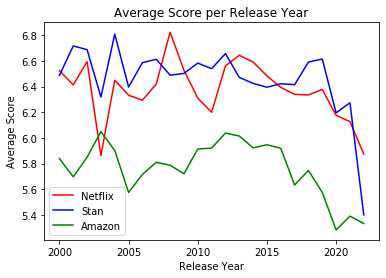

In [143]:
#plot score over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix Average Score'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan Average Score'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon Average Score'],color = 'green',label = "Amazon")
plt.title("Average Score per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Score")
plt.legend()
plt.show()

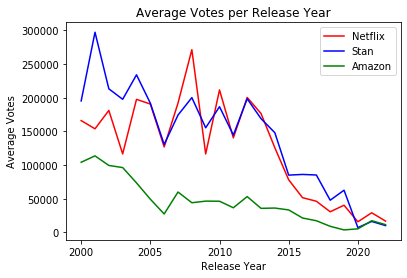

In [133]:
#average vote count over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix Average Votes'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan Average Votes'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon Average Votes'],color = 'green',label = "Amazon")
plt.title("Average Votes per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Votes")
plt.legend()
plt.show()

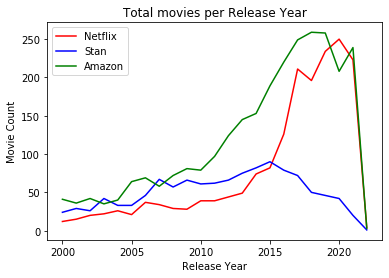

In [146]:
#movie release over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix Total Movies'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan Total Movies'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon Total Movies'],color = 'green',label = "Amazon")
plt.title("Total movies per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Movie Count")
plt.legend()
plt.show()

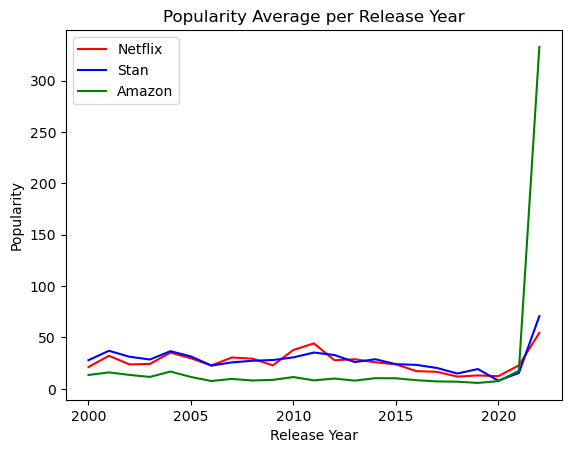

In [36]:
#popularity average over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix Popularity Average'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan Popularity Average'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon Popularity Average'],color = 'green',label = "Amazon")
plt.title("Popularity Average per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.legend()
plt.show()

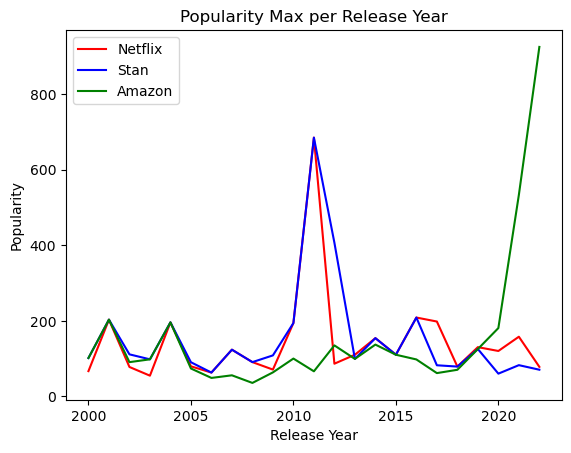

In [37]:
#popularity avg over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix Popularity Max'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan Popularity Max'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon Popularity Max'],color = 'green',label = "Amazon")
plt.title("Popularity Max per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.legend()
plt.show()

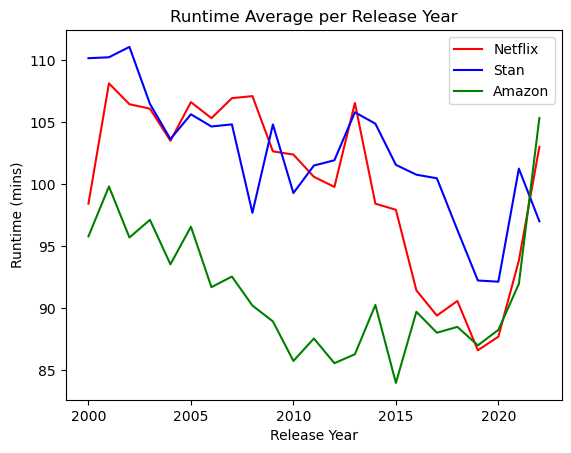

In [38]:
#runtime over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix Runtime Average'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan Runtime Average'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon Runtime Average'],color = 'green',label = "Amazon")
plt.title("Runtime Average per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Runtime (mins)")
plt.legend()
plt.show()

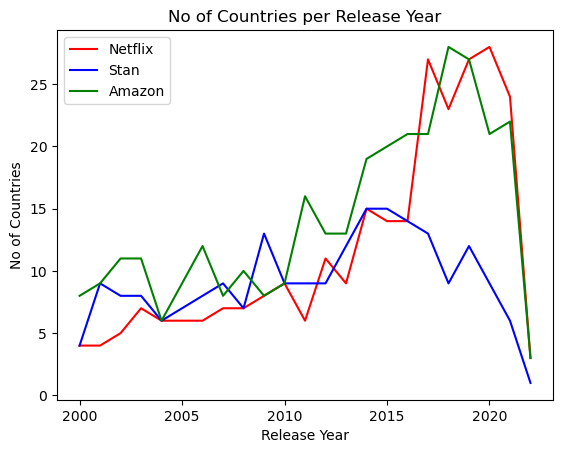

In [39]:
#countries over year
plt.plot(df_netflix_info['Year'],df_netflix_info['Netflix No of Countries'],color = 'red',label = "Netflix")
plt.plot(df_stan_info['Year'],df_stan_info['Stan No of Countries'],color = 'blue',label = "Stan")
plt.plot(df_amazon_info['Year'],df_amazon_info['Amazon No of Countries'],color = 'green',label = "Amazon")
plt.title("No of Countries per Release Year")
plt.xlabel("Release Year")
plt.ylabel("No of Countries")
plt.legend()
plt.show()

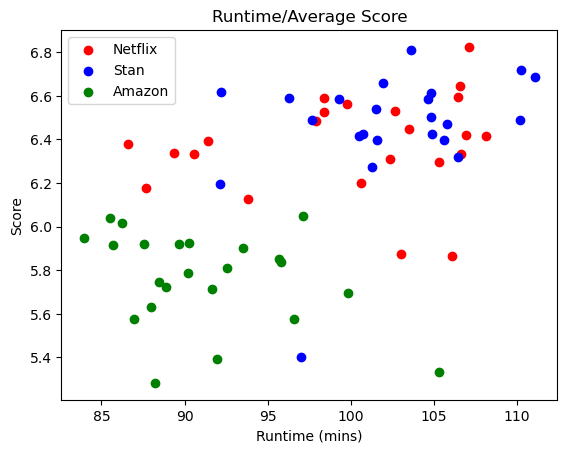

In [40]:
#runtime/average score 
plt.scatter(df_netflix_info['Netflix Runtime Average'],df_netflix_info['Netflix Average Score'],color = 'red',label = "Netflix")
plt.scatter(df_stan_info['Stan Runtime Average'],df_stan_info['Stan Average Score'],color = 'blue',label = "Stan")
plt.scatter(df_amazon_info['Amazon Runtime Average'],df_amazon_info['Amazon Average Score'],color = 'green',label = "Amazon")
plt.title("Runtime/Average Score")
plt.xlabel("Runtime (mins)")
plt.ylabel("Score")
plt.legend()
plt.show()

In [60]:
#netflix country dataframe
Net_Provider = []
Net_Country = []
Net_Total_Movies = []
Net_Sum_Votes = []
Net_Sum_Scores = []
Net_Average_Votes = []
Net_Average_Score = []
Net_Popularity_Average = []
Net_Popularity_Max = []
Net_Runtime_Average = []
Net_Country_Count = []

list_countries = countries = ['United States of America', 'Switzerland', 'Canada', 'France','United Kingdom', 'Australia', 'South Africa', 'Germany', 'Israel','Spain', 'Mexico', 'Ireland', 'Netherlands', 'New Zealand','Jamaica', 'Norway', 'Lithuania', 'Japan', 'Italy', 'Nigeria','Libyan Arab Jamahiriya', 'Hong Kong', 'Czech Republic', 'Finland','India', 'South Korea', 'China', 'Bulgaria', 'Aruba', 'Hungary','Luxembourg', 'Bahamas', 'Austria', 'Poland', 'Romania', 'Iceland','Afghanistan', 'Denmark', 'Kenya', 'United Arab Emirates', 'Iran','Saudi Arabia', 'Somalia', 'Palestinian Territory', 'Philippines','Yemen', 'Turkey', 'Liberia', 'Mali', 'Argentina', 'Belgium','Russia', 'Venezuela', 'Greece', 'Peru', 'Congo', 'Singapore','Brazil', 'Ethiopia', 'Slovakia', 'Morocco', 'Ghana', 'Nepal','Sweden', 'Thailand', 'Chile', 'Cambodia', 'Zimbabwe', 'Colombia','Cuba', 'Lebanon', 'Sierra Leone', 'Indonesia', 'Malaysia','Taiwan', 'Malawi', 'Malta', "Lao People's Democratic Republic",'Pakistan', 'Ukraine', 'Albania', 'Mauritius', 'Ecuador', 'Angola','Cameroon', 'Egypt', 'Cyprus', 'Portugal', 'Tanzania','Puerto Rico']

for country in list_countries:
    df_netflix_country = df_netflix[df_netflix['country_name']==country]
    try:
        Net_Provider.append('Netflix')
        Net_Country.append(country)
        Net_Total_Movies.append(df_netflix_country['original_title'].count())
        Net_Sum_Votes.append(df_netflix_country['imdb_votes'].sum())
        Net_Sum_Scores.append(df_netflix_country['imdb_rating'].sum())
        Net_Average_Votes.append(df_netflix_country['imdb_votes'].sum()/df_netflix_country['original_title'].count())
        Net_Average_Score.append(df_netflix_country['imdb_rating'].sum()/df_netflix_country['original_title'].count())
        Net_Popularity_Average.append(df_netflix_country['popularity'].mean())
        Net_Popularity_Max.append(df_netflix_country['popularity'].max())
        Net_Runtime_Average.append(df_netflix_country['runtime'].mean())   

    except:
       pass

df_netflix_country_info = pd.DataFrame({
    'Country':Net_Country,
    'Netflix Total Movies':Net_Total_Movies,
    'Netflix Sum Votes':Net_Sum_Votes,
    'Netflix Sum Score':Net_Sum_Scores,
    'Netflix Average Votes':Net_Average_Votes,
    'Netflix Average Score':Net_Average_Score,
    'Netflix Popularity Average':Net_Popularity_Average,
    'Netflix Popularity Max':Net_Popularity_Max,
    'Netflix Runtime Average':Net_Runtime_Average,

})

df_netflix_country_info.reset_index()

lat = []
lon = []

nf_country = df_netflix_country_info['Country'].tolist()

for x in nf_country:
    try:
        params = {
            'country':f'{x}'
        }
        url='https://api.geoapify.com/v1/geocode/search?&apiKey=f619430c76c7485aaeccc2fc5da48b08'

        response = requests.get(url,params=params).json()
        lon.append(response["features"][0]["properties"]["lon"])
        lat.append(response["features"][0]["properties"]["lat"])
    
    except:
        lon.append('NA')
        lat.append('NA')

df_netflix_country_info['Netflix Lat'] = lat
df_netflix_country_info['Netflix Lon'] = lon

df_netflix_country_info.dropna()

,Country,Netflix Total Movies,Netflix Sum Votes,Netflix Sum Score,Netflix Average Votes,Netflix Average Score,Netflix Popularity Average,Netflix Popularity Max,Netflix Runtime Average,Netflix Lat,Netflix Lon
0,United States of America,1145,89621811,7248.2,78272.324017,6.330306,21.831550,685.121,92.138865,39.7837,-100.446
1,Switzerland,1,168,7.3,168.000000,7.300000,1.350000,1.350,25.000000,46.7986,8.23197
2,Canada,118,7079861,726.3,59998.822034,6.155085,21.603051,129.650,93.313559,61.0667,-107.992
3,France,24,4356684,167.2,181528.500000,6.966667,23.536375,54.205,102.750000,46.6034,1.88833
4,United Kingdom,112,14536478,741.5,129789.982143,6.620536,19.194527,154.271,91.464286,54.7024,-3.27658
5,Australia,114,3570522,739.0,31320.368421,6.482456,11.695307,208.811,97.596491,-24.7761,134.755
6,South Africa,24,350410,140.1,14600.416667,5.837500,10.591250,39.918,102.208333,-28.8166,24.9916
7,Germany,33,3500490,214.7,106075.454545,6.506061,20.435061,67.706,105.787879,51.1638,10.4478
9,Spain,5,357706,31.2,71541.200000,6.240000,18.705200,31.447,98.800000,39.3261,-4.83798
10,Mexico,6,11830,36.1,1971.666667,6.016667,5.532333,9.612,60.500000,23.6585,-102.008


In [61]:
#stan country dataframe
Stan_Provider = []
Stan_Country = []
Stan_Total_Movies = []
Stan_Sum_Votes = []
Stan_Sum_Scores = []
Stan_Average_Votes = []
Stan_Average_Score = []
Stan_Popularity_Average = []
Stan_Popularity_Max = []
Stan_Runtime_Average = []
Stan_Country_Count = []

list_countries = countries = ['United States of America', 'Switzerland', 'Canada', 'France','United Kingdom', 'Australia', 'South Africa', 'Germany', 'Israel','Spain', 'Mexico', 'Ireland', 'Netherlands', 'New Zealand','Jamaica', 'Norway', 'Lithuania', 'Japan', 'Italy', 'Nigeria','Libyan Arab Jamahiriya', 'Hong Kong', 'Czech Republic', 'Finland','India', 'South Korea', 'China', 'Bulgaria', 'Aruba', 'Hungary','Luxembourg', 'Bahamas', 'Austria', 'Poland', 'Romania', 'Iceland','Afghanistan', 'Denmark', 'Kenya', 'United Arab Emirates', 'Iran','Saudi Arabia', 'Somalia', 'Palestinian Territory', 'Philippines','Yemen', 'Turkey', 'Liberia', 'Mali', 'Argentina', 'Belgium','Russia', 'Venezuela', 'Greece', 'Peru', 'Congo', 'Singapore','Brazil', 'Ethiopia', 'Slovakia', 'Morocco', 'Ghana', 'Nepal','Sweden', 'Thailand', 'Chile', 'Cambodia', 'Zimbabwe', 'Colombia','Cuba', 'Lebanon', 'Sierra Leone', 'Indonesia', 'Malaysia','Taiwan', 'Malawi', 'Malta', "Lao People's Democratic Republic",'Pakistan', 'Ukraine', 'Albania', 'Mauritius', 'Ecuador', 'Angola','Cameroon', 'Egypt', 'Cyprus', 'Portugal', 'Tanzania','Puerto Rico']

for country in list_countries:
    df_stan_country = df_stan[df_stan['country_name']==country]
    try:
        Stan_Provider.append('Stan')
        Stan_Country.append(country)
        Stan_Total_Movies.append(df_stan_country['original_title'].count())
        Stan_Sum_Votes.append(df_stan_country['imdb_votes'].sum())
        Stan_Sum_Scores.append(df_stan_country['imdb_rating'].sum())
        Stan_Average_Votes.append(df_stan_country['imdb_votes'].sum()/df_stan_country['original_title'].count())
        Stan_Average_Score.append(df_stan_country['imdb_rating'].sum()/df_stan_country['original_title'].count())
        Stan_Popularity_Average.append(df_stan_country['popularity'].mean())
        Stan_Popularity_Max.append(df_stan_country['popularity'].max())
        Stan_Runtime_Average.append(df_stan_country['runtime'].mean())

    except:
       pass

df_stan_country_info = pd.DataFrame({
    'Country':Stan_Country,
    'Stan Total Movies':Stan_Total_Movies,
    'Stan Sum Votes':Stan_Sum_Votes,
    'Stan Sum Score':Stan_Sum_Scores,
    'Stan Average Votes':Stan_Average_Votes,
    'Stan Average Score':Stan_Average_Score,
    'Stan Popularity Average':Stan_Popularity_Average,
    'Stan Popularity Max':Stan_Popularity_Max,
    'Stan Runtime Average':Stan_Runtime_Average,

})

df_stan_country_info.reset_index()

lat = []
lon = []

st_country = df_stan_country_info['Country'].tolist()

for x in st_country:
    try:
        params = {
            'country':f'{x}'
        }
        url='https://api.geoapify.com/v1/geocode/search?&apiKey=f619430c76c7485aaeccc2fc5da48b08'

        response = requests.get(url,params=params).json()
        lon.append(response["features"][0]["properties"]["lon"])
        lat.append(response["features"][0]["properties"]["lat"])
    
    except:
        lon.append('NA')
        lat.append('NA')
        
df_stan_country_info['Stan Lat'] = lat
df_stan_country_info['Stan Lon'] = lon

df_stan_country_info.dropna()

,Country,Stan Total Movies,Stan Sum Votes,Stan Sum Score,Stan Average Votes,Stan Average Score,Stan Popularity Average,Stan Popularity Max,Stan Runtime Average,Stan Lat,Stan Lon
0,United States of America,613,99704291,3927.4,162649.740620,6.406852,31.012276,685.121,103.367047,39.7837,-100.446
1,Switzerland,2,137664,11.7,68832.000000,5.850000,26.735500,31.918,95.500000,46.7986,8.23197
2,Canada,69,8337972,441.1,120840.173913,6.392754,30.642174,95.857,101.159420,61.0667,-107.992
3,France,43,7480816,291.5,173972.465116,6.779070,21.563465,62.857,109.418605,46.6034,1.88833
4,United Kingdom,166,22442567,1145.9,135196.186747,6.903012,17.241241,154.271,93.518072,54.7024,-3.27658
5,Australia,125,3733072,782.8,29864.576000,6.262400,12.094672,208.811,99.376000,-24.7761,134.755
6,South Africa,2,7214,12.2,3607.000000,6.100000,10.036000,16.238,89.000000,-28.8166,24.9916
7,Germany,43,7278520,281.4,169267.906977,6.544186,26.320023,108.592,105.837209,51.1638,10.4478
9,Spain,9,965790,60.0,107310.000000,6.666667,23.330222,64.144,108.333333,39.3261,-4.83798
10,Mexico,5,761170,31.1,152234.000000,6.220000,25.854000,61.917,124.000000,23.6585,-102.008


In [31]:
#amazon country dataframe
Ama_Provider = []
Ama_Country = []
Ama_Total_Movies = []
Ama_Sum_Votes = []
Ama_Sum_Scores = []
Ama_Average_Votes = []
Ama_Average_Score = []
Ama_Popularity_Average = []
Ama_Popularity_Max = []
Ama_Runtime_Average = []
Ama_Country_Count = []

list_countries = countries = ['United States of America', 'Switzerland', 'Canada', 'France','United Kingdom', 'Australia', 'South Africa', 'Germany', 'Israel','Spain', 'Mexico', 'Ireland', 'Netherlands', 'New Zealand','Jamaica', 'Norway', 'Lithuania', 'Japan', 'Italy', 'Nigeria','Libyan Arab Jamahiriya', 'Hong Kong', 'Czech Republic', 'Finland','India', 'South Korea', 'China', 'Bulgaria', 'Aruba', 'Hungary','Luxembourg', 'Bahamas', 'Austria', 'Poland', 'Romania', 'Iceland','Afghanistan', 'Denmark', 'Kenya', 'United Arab Emirates', 'Iran','Saudi Arabia', 'Somalia', 'Palestinian Territory', 'Philippines','Yemen', 'Turkey', 'Liberia', 'Mali', 'Argentina', 'Belgium','Russia', 'Venezuela', 'Greece', 'Peru', 'Congo', 'Singapore','Brazil', 'Ethiopia', 'Slovakia', 'Morocco', 'Ghana', 'Nepal','Sweden', 'Thailand', 'Chile', 'Cambodia', 'Zimbabwe', 'Colombia','Cuba', 'Lebanon', 'Sierra Leone', 'Indonesia', 'Malaysia','Taiwan', 'Malawi', 'Malta', "Lao People's Democratic Republic",'Pakistan', 'Ukraine', 'Albania', 'Mauritius', 'Ecuador', 'Angola','Cameroon', 'Egypt', 'Cyprus', 'Portugal', 'Tanzania','Puerto Rico']

for country in list_countries:
    df_amazon_country = df_amazon[df_amazon['country_name']==country]
    try:
        Ama_Provider.append('Amazon')
        Ama_Country.append(country)
        Ama_Total_Movies.append(df_amazon_country['original_title'].count())
        Ama_Sum_Votes.append(df_amazon_country['imdb_votes'].sum())
        Ama_Sum_Scores.append(df_amazon_country['imdb_rating'].sum())
        Ama_Average_Votes.append(df_amazon_country['imdb_votes'].sum()/df_amazon_country['original_title'].count())
        Ama_Average_Score.append(df_amazon_country['imdb_rating'].sum()/df_amazon_country['original_title'].count())
        Ama_Popularity_Average.append(df_amazon_country['popularity'].mean())
        Ama_Popularity_Max.append(df_amazon_country['popularity'].max())
        Ama_Runtime_Average.append(df_amazon_country['runtime'].mean())

    except:
       pass

df_amazon_country_info = pd.DataFrame({
    'Country':Ama_Country,
    'Amazon Total Movies':Ama_Total_Movies,
    'Amazon Sum Votes':Ama_Sum_Votes,
    'Amazon Sum Score':Ama_Sum_Scores,
    'Amazon Average Votes':Ama_Average_Votes,
    'Amazon Average Score':Ama_Average_Score,
    'Amazon Popularity Average':Ama_Popularity_Average,
    'Amazon Popularity Max':Ama_Popularity_Max,
    'Amazon Runtime Average':Ama_Runtime_Average,

})

df_amazon_country_info.reset_index()

lat = []
lon = []

az_country = df_amazon_country_info['Country'].tolist()

for x in az_country:
    try:
        params = {
                'country':f'{x}'
            }
        url='https://api.geoapify.com/v1/geocode/search?&apiKey=f619430c76c7485aaeccc2fc5da48b08'

        response = requests.get(url,params=params).json()
        lon.append(response["features"][0]["properties"]["lon"])
        lat.append(response["features"][0]["properties"]["lat"])

       
    except:
        lon.append('NA')
        lat.append('NA')

df_amazon_country_info['Amazon Lat'] = lat
df_amazon_country_info['Amazon Lon'] = lon

df_amazon_country_info.dropna


,Country,Amazon Total Movies,Amazon Sum Votes,Amazon Sum Score,Amazon Average Votes,Amazon Average Score,Amazon Popularity Average,Amazon Popularity Max,Amazon Runtime Average,Amazon Lat,Amazon Lon
0,United States of America,1548,47969998,8690.9,30988.370801,5.614276,10.261784,533.475,88.620155,39.7837,-100.446
1,Switzerland,4,21803,21.8,5450.750000,5.450000,4.913000,13.377,93.750000,46.7986,8.23197
2,Canada,434,5785116,2495.3,13329.760369,5.749539,7.597691,132.652,87.394009,61.0667,-107.992
3,France,31,2587130,197.2,83455.806452,6.361290,18.924290,118.403,98.709677,46.6034,1.88833
4,United Kingdom,272,6187099,1589.5,22746.687500,5.843750,7.507625,102.745,86.852941,54.7024,-3.27658
...,...,...,...,...,...,...,...,...,...,...,...
77,Lao People's Democratic Republic,1,31,8.3,31.000000,8.300000,0.600000,0.600,64.000000,20.0171,103.378
79,Ukraine,1,3996,5.7,3996.000000,5.700000,11.428000,11.428,110.000000,49.4872,31.2718
82,Ecuador,1,130,7.9,130.000000,7.900000,3.531000,3.531,94.000000,-1.33977,-79.3667
86,Cyprus,1,3040,3.4,3040.000000,3.400000,925.268000,925.268,98.000000,34.9823,33.1451


In [12]:
df_merge1 = df_netflix_country_info.merge(df_stan_country_info, on = 'Country')
df_providers_country_info = df_merge1.merge(df_amazon_country_info, on = 'Country')
df_providers_country_info

,Country,Netflix Total Movies,Netflix Sum Votes,Netflix Sum Score,Netflix Average Votes,Netflix Average Score,Netflix Popularity Average,Netflix Popularity Max,Netflix Runtime Average,Netflix Lat,...,Amazon Total Movies,Amazon Sum Votes,Amazon Sum Score,Amazon Average Votes,Amazon Average Score,Amazon Popularity Average,Amazon Popularity Max,Amazon Runtime Average,Amazon Lat,Amazon Lon
0,United States of America,1145,89621811,7248.2,78272.324017,6.330306,21.831550,685.121,92.138865,39.783730,...,1548,47969998,8690.9,30988.370801,5.614276,10.261784,533.475,88.620155,39.783730,-100.445882
1,Canada,118,7079861,726.3,59998.822034,6.155085,21.603051,129.650,93.313559,61.066692,...,434,5785116,2495.3,13329.760369,5.749539,7.597691,132.652,87.394009,61.066692,-107.991707
2,France,24,4356684,167.2,181528.500000,6.966667,23.536375,54.205,102.750000,46.603354,...,31,2587130,197.2,83455.806452,6.361290,18.924290,118.403,98.709677,46.603354,1.888334
3,United Kingdom,112,14536478,741.5,129789.982143,6.620536,19.194527,154.271,91.464286,54.702354,...,272,6187099,1589.5,22746.687500,5.843750,7.507625,102.745,86.852941,54.702354,-3.276575
4,Australia,114,3570522,739.0,31320.368421,6.482456,11.695307,208.811,97.596491,-24.776109,...,119,505310,706.7,4246.302521,5.938655,3.395160,29.830,87.571429,-24.776109,134.755000
5,Germany,33,3500490,214.7,106075.454545,6.506061,20.435061,67.706,105.787879,51.163818,...,50,4094250,298.2,81885.000000,5.964000,16.307580,101.626,98.340000,51.163818,10.447831


In [100]:
netflix_map = df_netflix_country_info[df_netflix_country_info['Netflix Lon']!='NA'].hvplot.points(
   "Netflix Lon",
    "Netflix Lat",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Netflix Total Movies",
    scale = 2,
    c = "Netflix Average Score",
    cmap='Reds',
    clim=(5,9),
   xlabel = 'Latitude',
    ylabel = 'Longitude',
    size_fn=lambda x: x+1,
    alpha=1,
    clabel = 'Average Score',   
    title = "Netflix - Country of Origin vs Quality",
   )


netflix_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Netflix Lon,Netflix Lat]   (Netflix Average Score,Netflix Total Movies)

In [103]:
stan_map = df_stan_country_info[df_stan_country_info['Stan Lon']!='NA'].hvplot.points(
    "Stan Lon",
    "Stan Lat",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    size = "Stan Total Movies",
    scale = 2,
    c = "Stan Average Score",
    cmap='Blues',
    clim=(5,9),
    clabel = 'Average Score',
    size_fn=lambda x: x+1,
    alpha=1,
    title = "Stan - Country of Origin vs Quality")

stan_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Stan Lon,Stan Lat]   (Stan Average Score,Stan Total Movies)

In [104]:
amazon_map = df_amazon_country_info[df_amazon_country_info['Amazon Lon']!='NA'].hvplot.points(
    "Amazon Lon",
    "Amazon Lat",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Amazon Total Movies",
    scale = 2,
    c = "Amazon Average Score",
    cmap='Greens',
    clim=(5,9),
    size_fn=lambda x: x+1,
    alpha=1,
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    clabel = 'Average Score',
    title = "Amazon - Country of Origin vs Quality")

amazon_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Amazon Lon,Amazon Lat]   (Amazon Average Score,Amazon Total Movies)

In [106]:
Net_Year = []
Net_Total_Movies = []
Net_Profit = []


list_years = np.arange(2000,2023,1)

for year in list_years:
    df_netflix_profit_year = df_netflix_profit[df_netflix_profit['year']==str(year)]
    Net_Year.append(year)
    Net_Total_Movies.append(df_netflix_profit_year['original_title'].count())
    Net_Profit.append(df_netflix_profit_year['profit'].sum())

df_netflix_profit_info = pd.DataFrame({
    'Year':Net_Year,
    'Netflix Total Movies':Net_Total_Movies,
    'Netflix Profit':Net_Profit
})

df_netflix_profit_info


,Year,Netflix Total Movies,Netflix Profit
0,2000,9,293352922
1,2001,14,1116963214
2,2002,14,1396034138
3,2003,18,663311158
4,2004,22,3401989636
5,2005,18,1761111114
6,2006,26,2004230465
7,2007,28,3285454811
8,2008,23,4373780841
9,2009,22,2506067563


In [107]:
Stan_Year = []
Stan_Total_Movies = []
Stan_Profit = []


list_years = np.arange(2000,2023,1)

for year in list_years:
    df_stan_profit_year = df_stan_profit[df_stan_profit['year']==str(year)]
    Stan_Year.append(year)
    Stan_Total_Movies.append(df_stan_profit_year['original_title'].count())
    Stan_Profit.append(df_stan_profit_year['profit'].sum())

df_stan_profit_info = pd.DataFrame({
    'Year':Stan_Year,
    'Stan Total Movies':Stan_Total_Movies,
    'Stan Profit':Stan_Profit
})

df_stan_profit_info

,Year,Stan Total Movies,Stan Profit
0,2000,20,2855347830
1,2001,25,3890402389
2,2002,24,3070999648
3,2003,36,4440294235
4,2004,31,4020344973
5,2005,27,2889981978
6,2006,32,2628858798
7,2007,54,4855121873
8,2008,39,5380674292
9,2009,48,4787903283


In [108]:
Ama_Year = []
Ama_Total_Movies = []
Ama_Profit = []


list_years = np.arange(2000,2023,1)

for year in list_years:
    df_amazon_profit_year = df_amazon_profit[df_amazon_profit['year']==str(year)]
    Ama_Year.append(year)
    Ama_Total_Movies.append(df_amazon_profit_year['original_title'].count())
    Ama_Profit.append(df_amazon_profit_year['profit'].sum())

df_amazon_profit_info = pd.DataFrame({
    'Year':Ama_Year,
    'Amazon Total Movies':Ama_Total_Movies,
    'Amazon Profit':Ama_Profit
})

df_amazon_profit_info

,Year,Amazon Total Movies,Amazon Profit
0,2000,16,1338961704
1,2001,11,1975832630
2,2002,16,2261627240
3,2003,11,1709880286
4,2004,19,1642029819
5,2005,31,1929198388
6,2006,21,872532315
7,2007,26,1087529981
8,2008,22,1951517695
9,2009,25,2128393488


Text(0, 0.5, 'Profit')

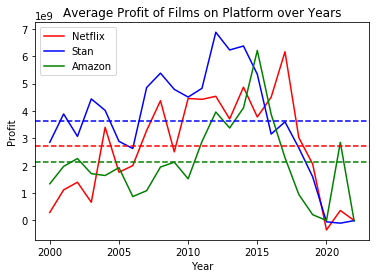

In [119]:
plt.plot(df_netflix_profit_info['Year'],df_netflix_profit_info['Netflix Profit'],color='red',label='Netflix')
plt.plot(df_stan_profit_info['Year'],df_stan_profit_info['Stan Profit'],color='blue',label='Stan')
plt.plot(df_amazon_profit_info['Year'],df_amazon_profit_info['Amazon Profit'],color='green',label='Amazon')
plt.title("Average Profit of Films on Platform over Years")
plt.xlabel("Year")
plt.legend()
plt.axhline(y=df_netflix_profit_info['Netflix Profit'].mean(), color = 'red', linestyle = '--')
plt.axhline(y=df_stan_profit_info['Stan Profit'].mean(), color = 'blue', linestyle = '--')
plt.axhline(y=df_amazon_profit_info['Amazon Profit'].mean(), color = 'green', linestyle = '--')
plt.ylabel("Profit")

In [37]:
df_amazon_country_info[df_amazon_country_info['Amazon Lon']=='NA']

,Country,Amazon Total Movies,Amazon Sum Votes,Amazon Sum Score,Amazon Average Votes,Amazon Average Score,Amazon Popularity Average,Amazon Popularity Max,Amazon Runtime Average,Amazon Lat,Amazon Lon
43,Palestinian Territory,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NA,NA
89,Puerto Rico,1,8185,4.5,8185.0,4.5,20.563,20.563,99.0,NA,NA


In [ ]:
sns.